In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data=pd.read_excel("G:\Python\COVID 19\Pakistan dataset\Pakistan data.xlsx")

In [3]:
data.head(2)

,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Region,Still admitted
0,48,2,80,2020-03-11 00:00:00,0,0,ICT,2
1,61,0,95,2020-03-11 00:00:00,0,0,Punjab,0


In [4]:
data.columns=["Suspected Cases","Confirmed Cases", "Tests Performed","Date","Recovered","Deaths",
              "Region","Active Cases"]
data["Date"]=pd.to_datetime(data["Date"])
data.head(3)

,Suspected Cases,Confirmed Cases,Tests Performed,Date,Recovered,Deaths,Region,Active Cases
0,48,2,80,2020-03-11,0,0,ICT,2
1,61,0,95,2020-03-11,0,0,Punjab,0
2,84,14,171,2020-03-11,1,0,Sindh,13


In [5]:
total_confirmed_pakistan=data.pivot_table(values="Confirmed Cases", index="Date", aggfunc="sum")
total_confirmed_pakistan.reset_index(inplace=True)
total_confirmed_pakistan.head(2)

,Date,Confirmed Cases
0,2020-03-11,19
1,2020-03-12,20


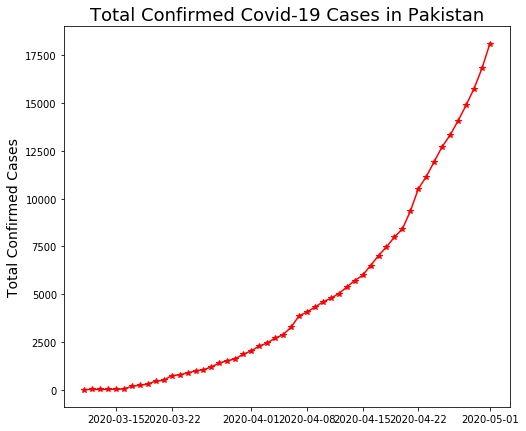

In [6]:
plt.figure(figsize=(8,7))
plt.plot(total_confirmed_pakistan["Date"],total_confirmed_pakistan["Confirmed Cases"],color="r", marker="*")                                                                                                                                                                                                                                                                                                                                                                                                                                                 
plt.ylabel("Total Confirmed Cases", fontsize=14)
plt.title("Total Confirmed Covid-19 Cases in Pakistan", fontsize=18)
plt.show()

In [7]:
total_confirmed_pakistan_april=total_confirmed_pakistan[total_confirmed_pakistan["Date"]>=datetime(2020,4,1)]
total_confirmed_pakistan_april["Date"]=total_confirmed_pakistan_april["Date"].astype(str)

C:\Users\Zanjbeel Khan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


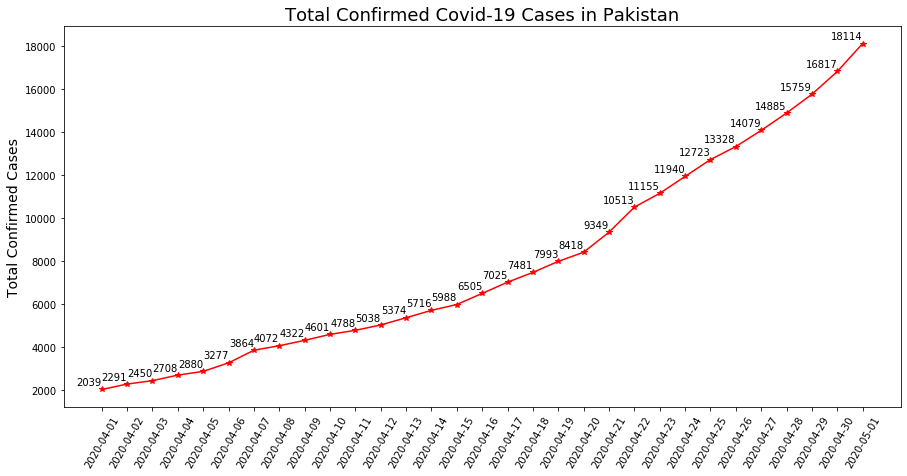

In [8]:
plt.figure(figsize=(15,7))
plt.plot(total_confirmed_pakistan_april["Date"],total_confirmed_pakistan_april["Confirmed Cases"],color="r", marker="*")
for i, v in enumerate(total_confirmed_pakistan_april["Confirmed Cases"]):
    plt.text(i, v+200, "%d" %v, ha="right")
plt.ylabel("Total Confirmed Cases", fontsize=14)
plt.title("Total Confirmed Covid-19 Cases in Pakistan", fontsize=18)
plt.xticks(rotation=60)
plt.show()

In [9]:
total_tests_vs_confirmed_pakistan=data.pivot_table(values=["Tests Performed","Confirmed Cases","Deaths","Recovered"], index="Date", aggfunc="sum")
total_tests_vs_confirmed_pakistan.reset_index(inplace=True)
total_tests_vs_confirmed_pakistan["Date"]=total_tests_vs_confirmed_pakistan["Date"].astype(str)
total_tests_vs_confirmed_pakistan.head(2)

,Date,Confirmed Cases,Deaths,Recovered,Tests Performed
0,2020-03-11,19,0,1,422
1,2020-03-12,20,0,2,471


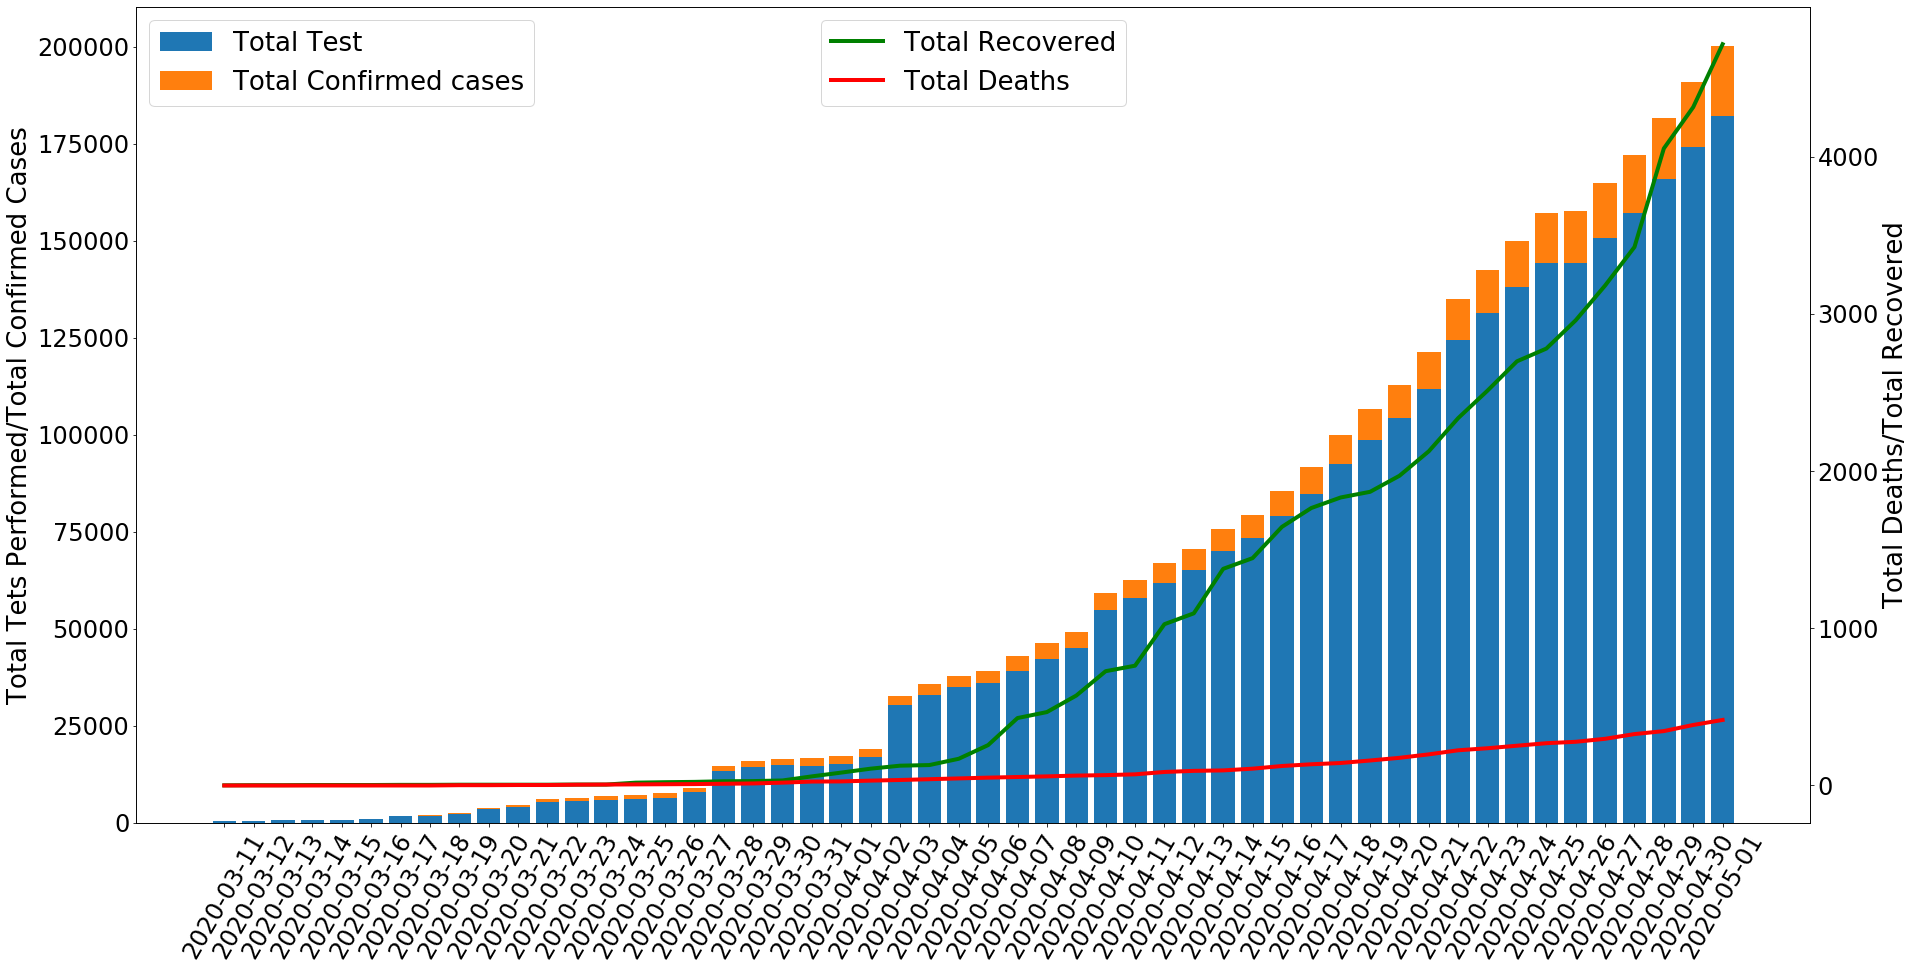

In [57]:
plt.figure(figsize=(30,15))
plt.bar(total_tests_vs_confirmed_pakistan["Date"], total_tests_vs_confirmed_pakistan["Tests Performed"], label='Total Test')
plt.bar(total_tests_vs_confirmed_pakistan["Date"], total_tests_vs_confirmed_pakistan["Confirmed Cases"], bottom=total_tests_vs_confirmed_pakistan["Tests Performed"],
       label='Total Confirmed cases')
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.ylabel("Total Tets Performed/Total Confirmed Cases", fontsize=26)
plt.legend(fontsize=26)
plt.twinx()
plt.plot(total_tests_vs_confirmed_pakistan["Date"], total_tests_vs_confirmed_pakistan["Recovered"], label='Total Recovered', color="g",lw=4)
plt.plot(total_tests_vs_confirmed_pakistan["Date"], total_tests_vs_confirmed_pakistan["Deaths"], label='Total Deaths', color="r", lw=4)
plt.yticks(fontsize=24)
plt.ylabel("Total Deaths/Total Recovered", fontsize=26)
plt.legend(loc="upper center",fontsize=26)
plt.show()

In [11]:
regionwise_timeseries_confirmed=data.pivot_table(values=["Confirmed Cases"], index="Date", columns="Region",aggfunc="sum")
regionwise_timeseries_confirmed.reset_index(inplace=True)
regionwise_timeseries_confirmed["Date"]=regionwise_timeseries_confirmed["Date"].astype(str)
regionwise_timeseries_confirmed.head(2)

Date Confirmed Cases                                   
Region                         AJK Balochistan GB ICT KP Punjab Sindh
0       2020-03-11               0           1  2   2  0      0    14
1       2020-03-12               0           1  3   2  0      0    14

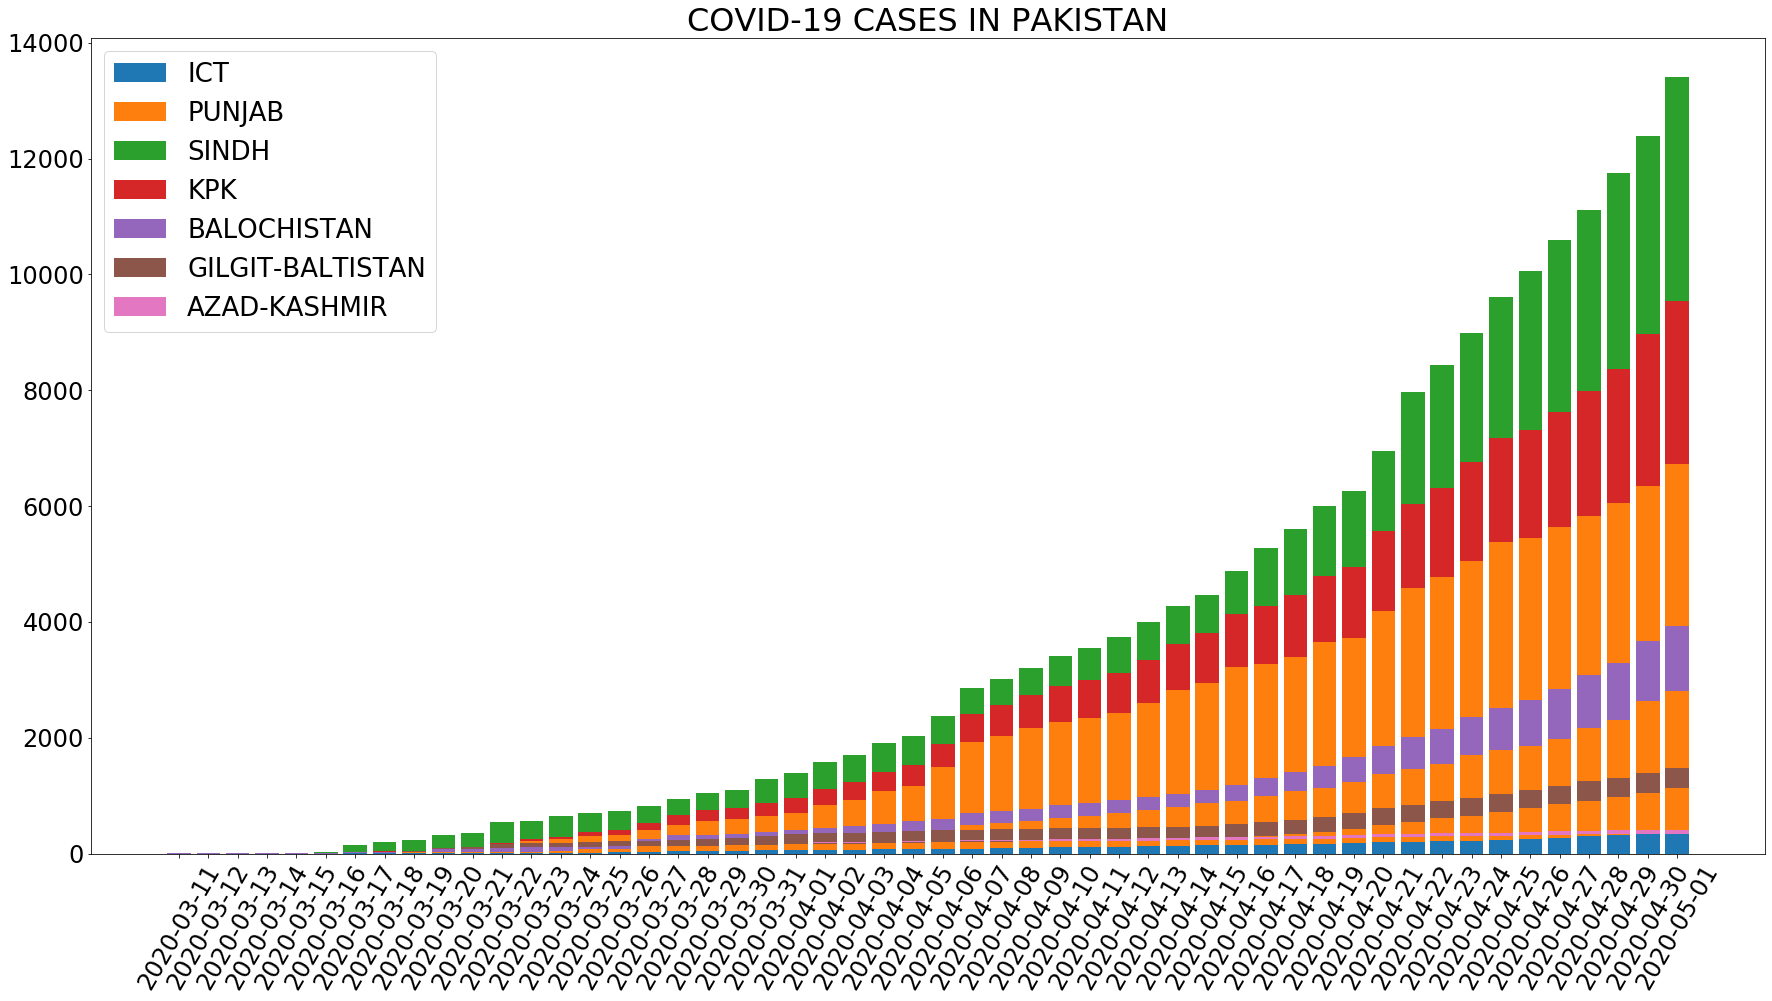

In [12]:
plt.figure(figsize=(30,15))
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["ICT"], label='ICT')
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["Punjab"], 
        bottom=regionwise_timeseries_confirmed["Confirmed Cases"]["ICT"], label='PUNJAB')
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["Sindh"], 
        bottom=regionwise_timeseries_confirmed["Confirmed Cases"]["Punjab"], label='SINDH')
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["KP"], 
        bottom=regionwise_timeseries_confirmed["Confirmed Cases"]["Punjab"], label='KPK')
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["Balochistan"], 
        bottom=regionwise_timeseries_confirmed["Confirmed Cases"]["KP"], label='BALOCHISTAN')
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["GB"], 
        bottom=regionwise_timeseries_confirmed["Confirmed Cases"]["Balochistan"], label='GILGIT-BALTISTAN')
plt.bar(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["AJK"], 
        bottom=regionwise_timeseries_confirmed["Confirmed Cases"]["GB"], label='AZAD-KASHMIR')
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.title("COVID-19 CASES IN PAKISTAN",fontsize=32)
plt.legend(fontsize=26)
plt.show()

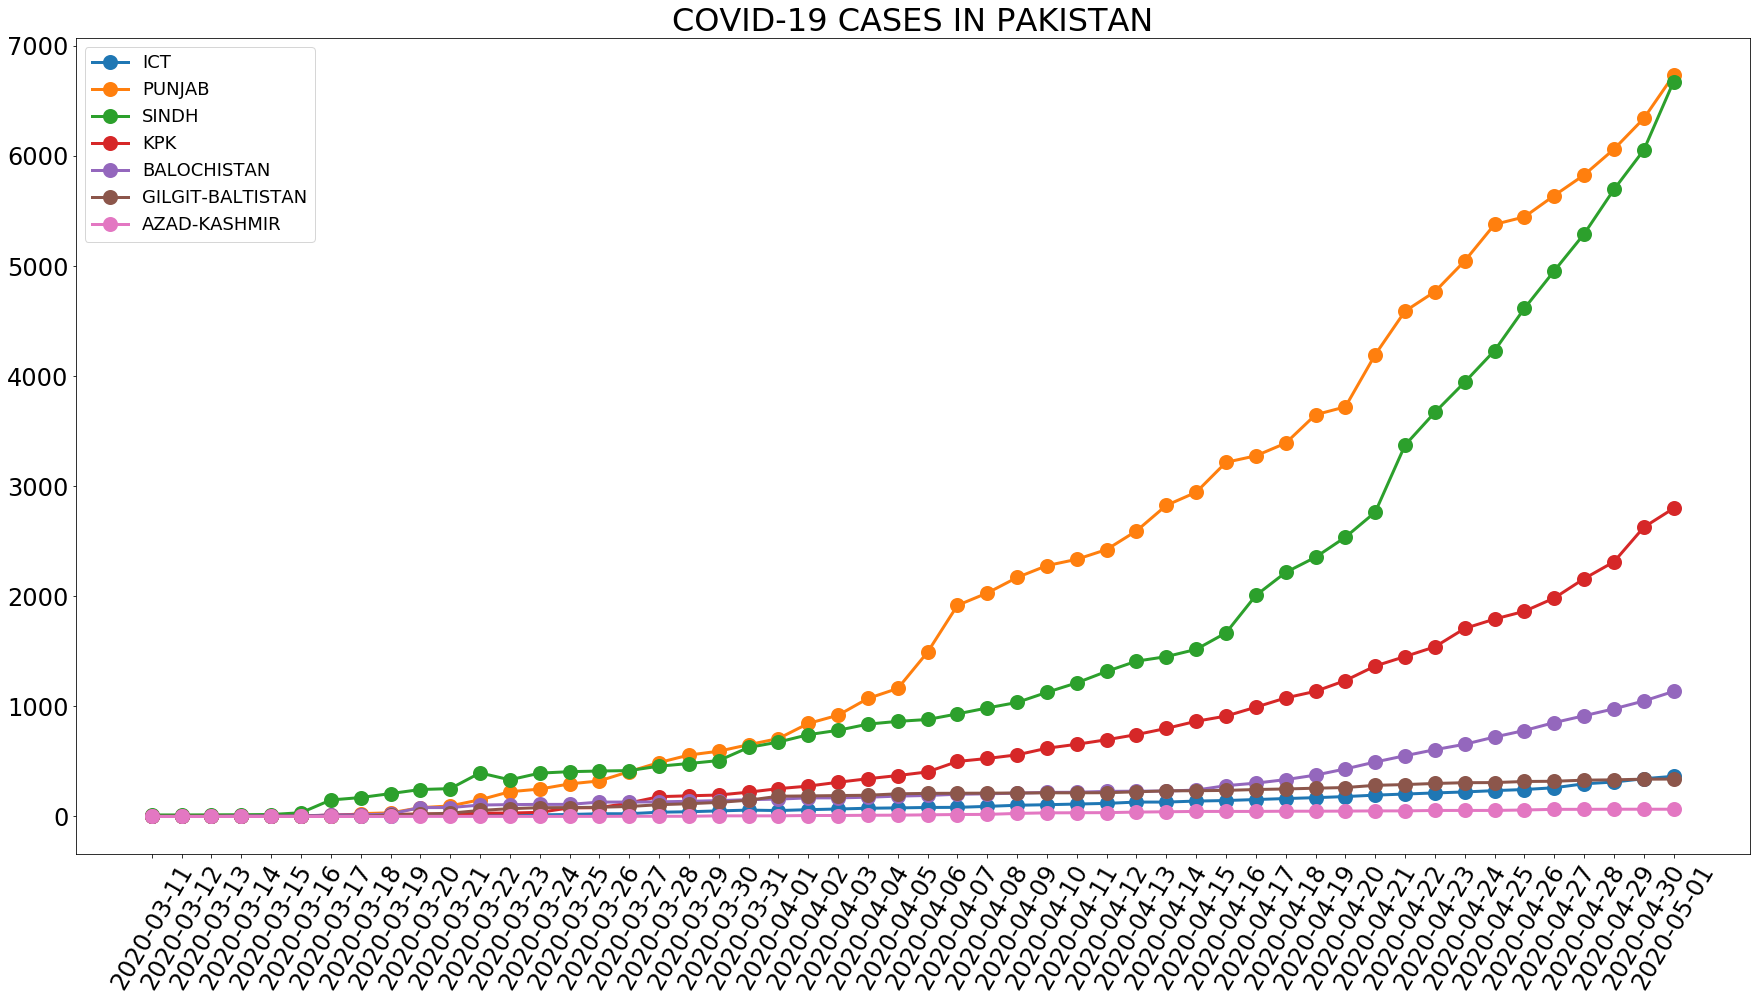

In [13]:
plt.figure(figsize=(30,15))
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["ICT"], label='ICT',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["Punjab"],label='PUNJAB',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["Sindh"],label='SINDH',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["KP"],label='KPK',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["Balochistan"],label='BALOCHISTAN',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["GB"],label='GILGIT-BALTISTAN',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(regionwise_timeseries_confirmed["Date"], regionwise_timeseries_confirmed["Confirmed Cases"]["AJK"],label='AZAD-KASHMIR',marker="o",mew=5,ms=10,linewidth=3)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.title("COVID-19 CASES IN PAKISTAN",fontsize=32)
plt.legend(fontsize=18)
plt.show()

In [14]:
total_active_and_confirmed=data.pivot_table(values=["Confirmed Cases","Active Cases"], index="Date",aggfunc="sum")
total_active_and_confirmed.reset_index(inplace=True)
total_active_and_confirmed["Date"]=total_active_and_confirmed["Date"].astype(str)
total_active_and_confirmed.head(2)

,Date,Active Cases,Confirmed Cases
0,2020-03-11,18,19
1,2020-03-12,18,20


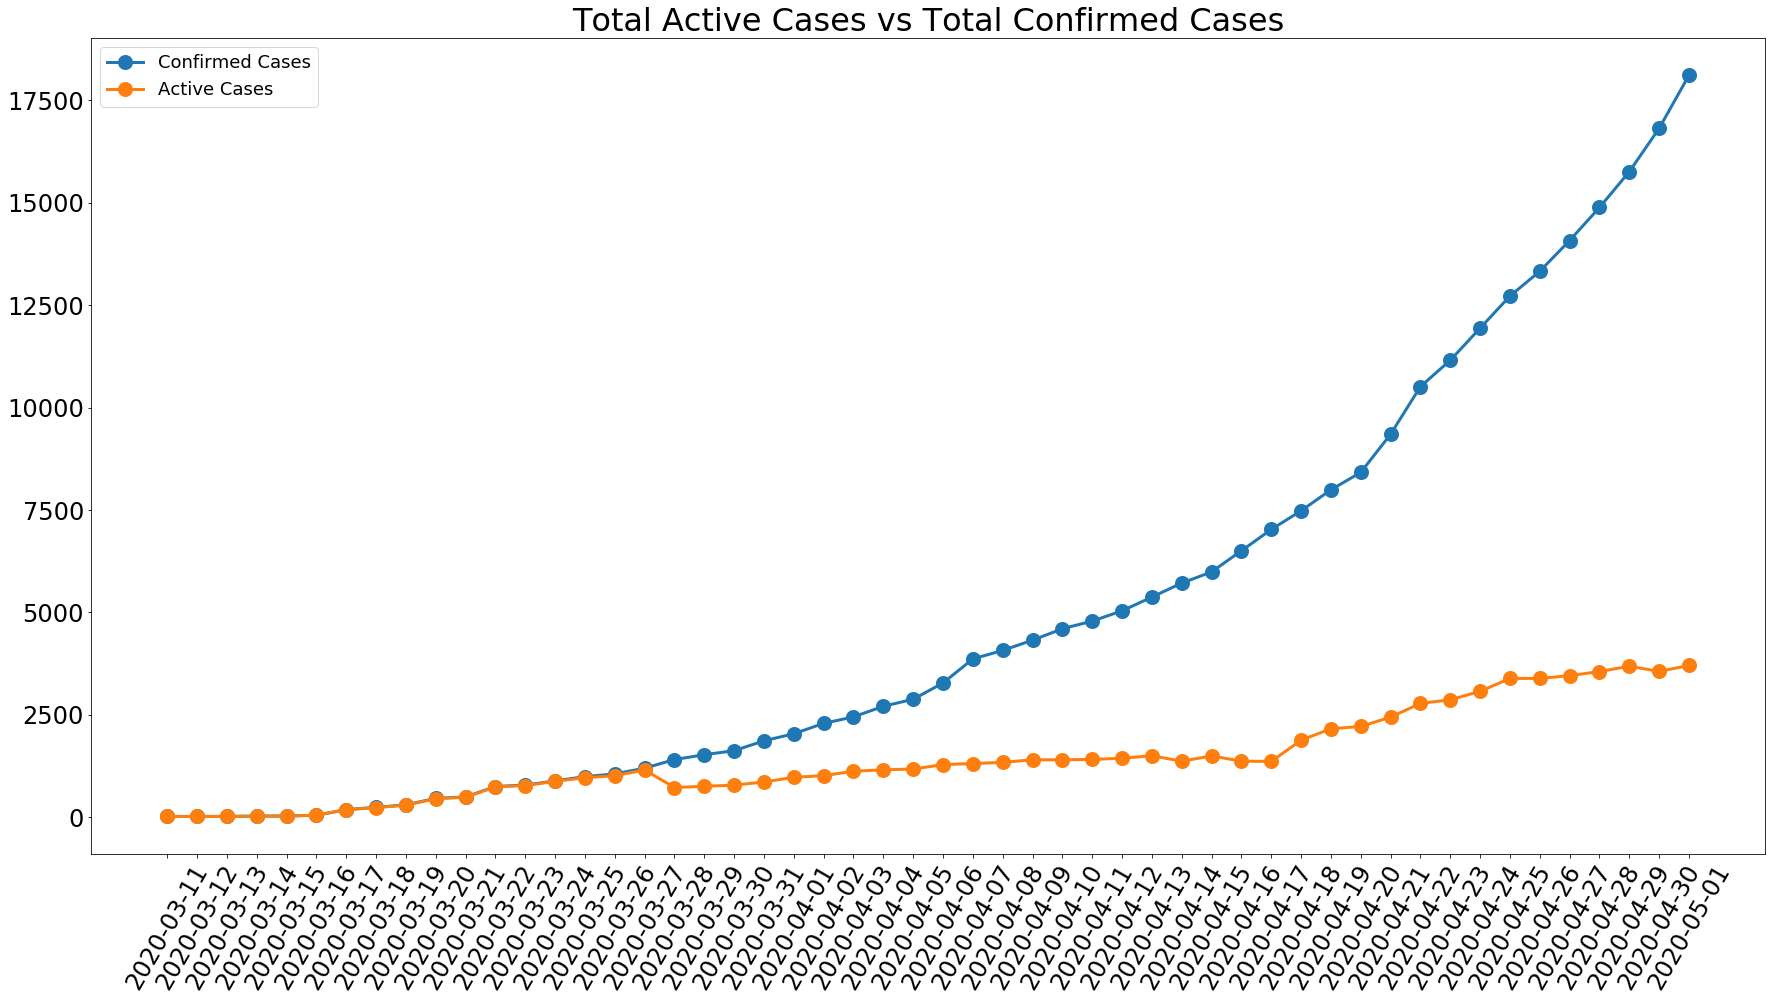

In [15]:
plt.figure(figsize=(30,15))
plt.plot(total_active_and_confirmed["Date"], total_active_and_confirmed["Confirmed Cases"], label='Confirmed Cases',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(total_active_and_confirmed["Date"], total_active_and_confirmed["Active Cases"],label='Active Cases',marker="o",mew=5,ms=10,linewidth=3)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.title("Total Active Cases vs Total Confirmed Cases",fontsize=32)
plt.legend(fontsize=18)
plt.show()

In [16]:
total_deaths_and_recovered=data.pivot_table(values=["Deaths","Recovered"], index="Date",aggfunc="sum")
total_deaths_and_recovered.reset_index(inplace=True)
total_deaths_and_recovered["Date"]=total_deaths_and_recovered["Date"].astype(str)
total_deaths_and_recovered.head(2)

,Date,Deaths,Recovered
0,2020-03-11,0,1
1,2020-03-12,0,2


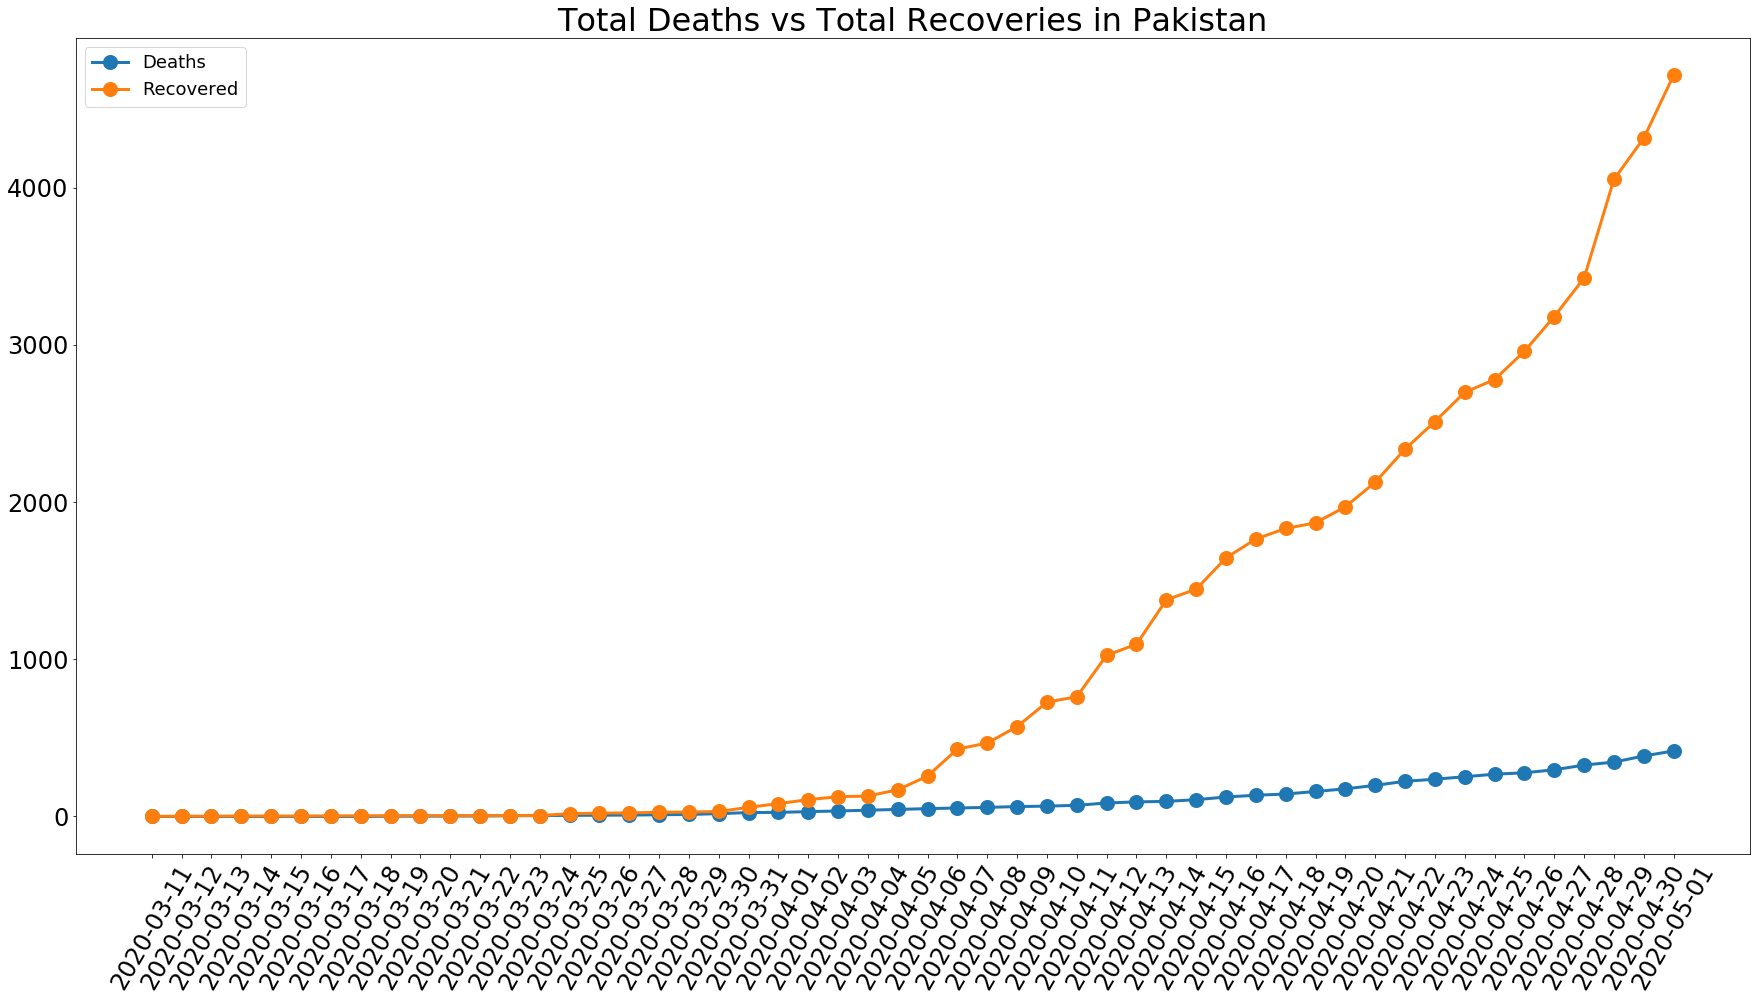

In [17]:
plt.figure(figsize=(30,15))
plt.plot(total_deaths_and_recovered["Date"], total_deaths_and_recovered["Deaths"], label='Deaths',marker="o",mew=5,ms=10,linewidth=3)
plt.plot(total_deaths_and_recovered["Date"], total_deaths_and_recovered["Recovered"],label='Recovered',marker="o",mew=5,ms=10,linewidth=3)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.title("Total Deaths vs Total Recoveries in Pakistan",fontsize=32)
plt.legend(fontsize=18)
plt.show()

In [18]:
regionwise_cases=data[data["Date"]>=datetime(2020,4,1)]
regionwise_cases.head(2)

,Suspected Cases,Confirmed Cases,Tests Performed,Date,Recovered,Deaths,Region,Active Cases
147,1703,54,1703,2020-04-01,3,0,ICT,16
148,4462,708,2720,2020-04-01,5,9,Punjab,357


In [19]:
regionwise_confirmed_cases_april=regionwise_cases.pivot_table(values=["Confirmed Cases"], index="Date", columns="Region",aggfunc="sum")
regionwise_confirmed_cases_april.reset_index(inplace=True)
regionwise_confirmed_cases_april["Date"]=regionwise_confirmed_cases_april["Date"].astype(str)
regionwise_confirmed_cases_april.head()

Date Confirmed Cases                                       
Region                         AJK Balochistan   GB ICT   KP Punjab Sindh
0       2020-04-01               6         158  184  54  253    708   676
1       2020-04-02               9         169  187  62  276    845   743
2       2020-04-03               9         169  190  68  311    920   783
3       2020-04-04              11         175  193  75  343   1072   839
4       2020-04-05              12         185  206  78  372   1163   864

In [20]:
regionwise_deaths_april=regionwise_cases.pivot_table(values=["Deaths"], index="Date", columns="Region",aggfunc="sum")
regionwise_deaths_april.reset_index(inplace=True)
regionwise_deaths_april["Date"]=regionwise_deaths_april["Date"].astype(str)
regionwise_deaths_april.head()

Date Deaths                                    
Region                AJK Balochistan GB ICT  KP Punjab Sindh
0       2020-04-01      0           1  2   0   6      9     8
1       2020-04-02      0           1  2   0   8     11     9
2       2020-04-03      0           1  3   0   9     11    11
3       2020-04-04      0           1  3   0  11     11    14
4       2020-04-05      0           1  3   0  14     12    15

In [21]:
regionwise_recovered_april=regionwise_cases.pivot_table(values=["Recovered"], index="Date", columns="Region",aggfunc="sum")
regionwise_recovered_april.reset_index(inplace=True)
regionwise_recovered_april["Date"]=regionwise_recovered_april["Date"].astype(str)
regionwise_recovered_april.head()

Date Recovered                                    
Region                   AJK Balochistan GB ICT  KP Punjab Sindh
0       2020-04-01         0          17  4   3   2      5    51
1       2020-04-02         0          17  4   3  19      6    58
2       2020-04-03         0          17  5   3  30      6    65
3       2020-04-04         0          17  9   3  30      6    65
4       2020-04-05         1          17  9   3  30     25    85

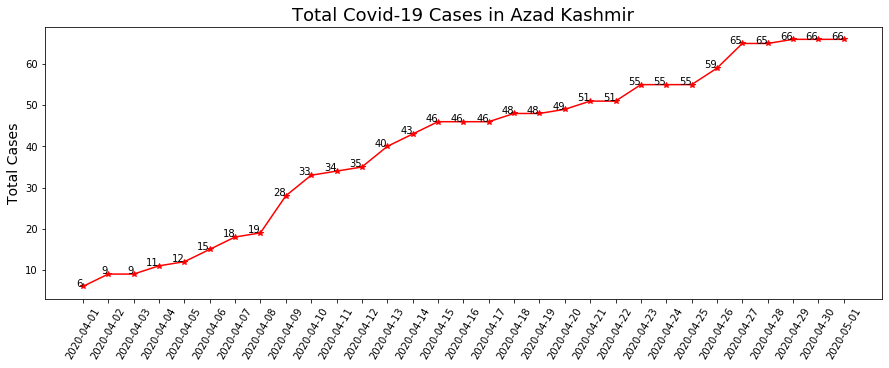

In [22]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["AJK"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["AJK"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in Azad Kashmir", fontsize=18)
plt.xticks(rotation=60)
plt.show()

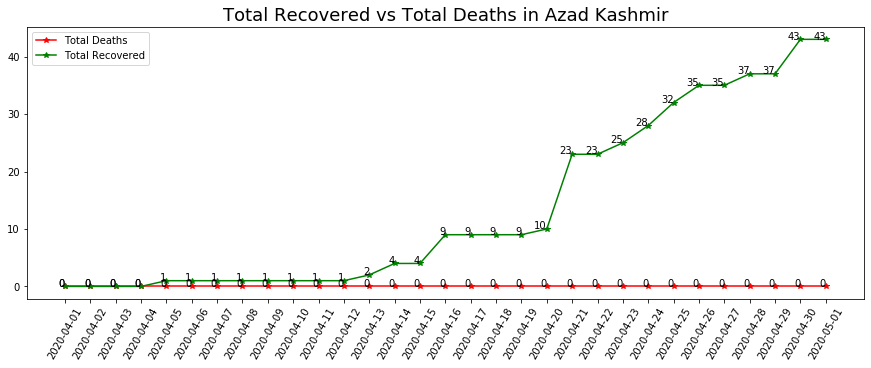

In [71]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["AJK"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["AJK"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.title("Total Recovered vs Total Deaths in Azad Kashmir", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["AJK"],color="g", marker="*", label="Total Recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["AJK"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()
plt.show()

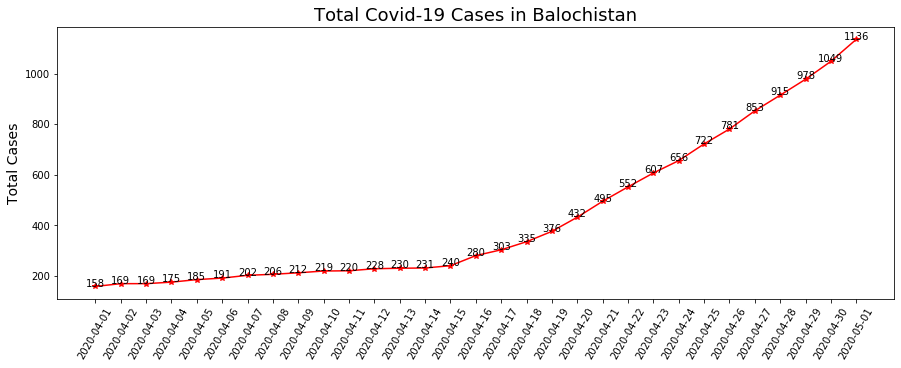

In [25]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["Balochistan"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["Balochistan"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in Balochistan", fontsize=18)
plt.xticks(rotation=60)
plt.show()

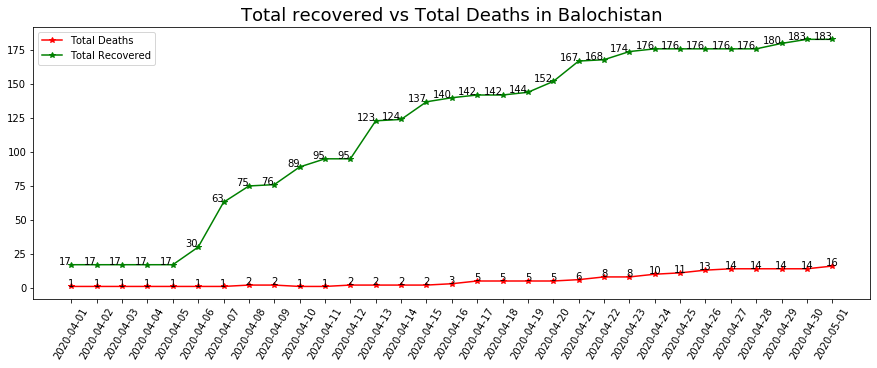

In [70]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["Balochistan"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["Balochistan"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.title("Total recovered vs Total Deaths in Balochistan", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["Balochistan"],color="g", marker="*", label="Total Recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["Balochistan"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()
plt.show()

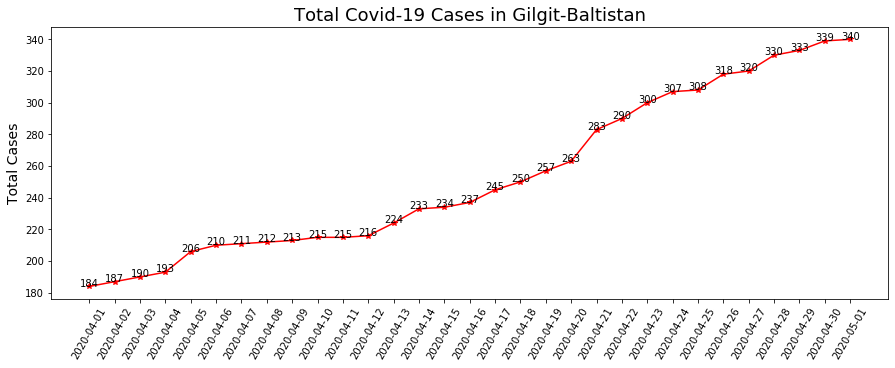

In [28]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["GB"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["GB"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in Gilgit-Baltistan", fontsize=18)
plt.xticks(rotation=60)
plt.show()

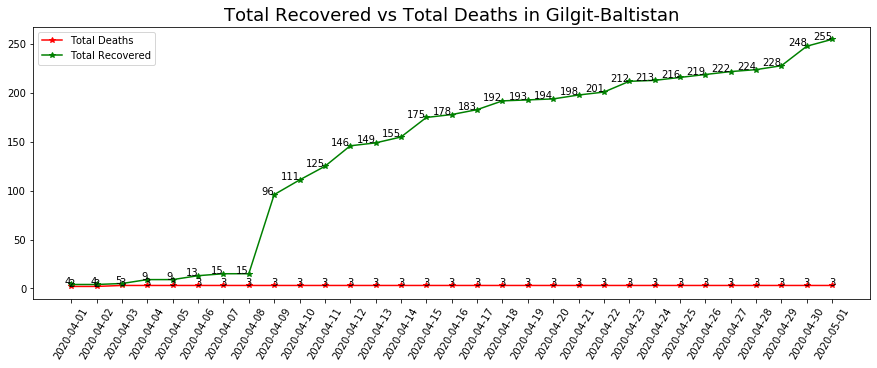

In [69]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["GB"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["GB"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.title("Total Recovered vs Total Deaths in Gilgit-Baltistan", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["GB"],color="g", marker="*", label="Total Recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["GB"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()
plt.show()

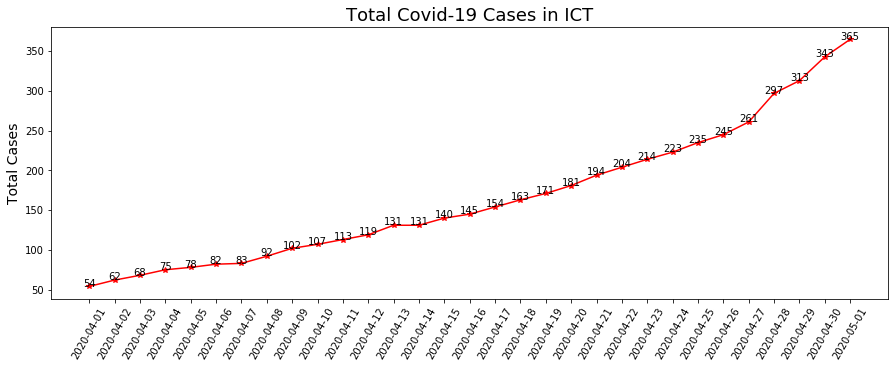

In [31]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["ICT"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["ICT"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in ICT", fontsize=18)
plt.xticks(rotation=60)
plt.show()

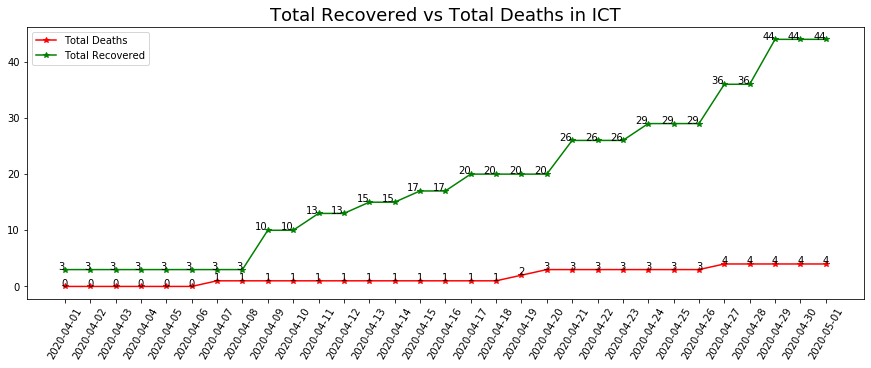

In [68]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["ICT"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["ICT"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.title("Total Recovered vs Total Deaths in ICT", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["ICT"],color="g", marker="*", label="Total Recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["ICT"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()    
plt.show()

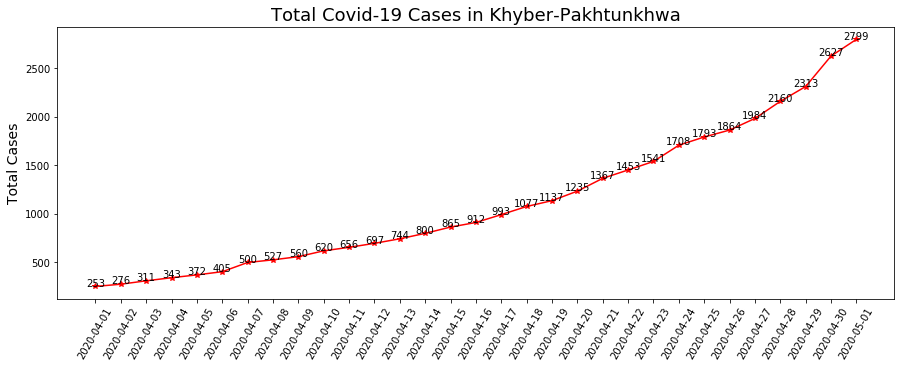

In [34]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["KP"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["KP"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in Khyber-Pakhtunkhwa", fontsize=18)
plt.xticks(rotation=60)
plt.show()

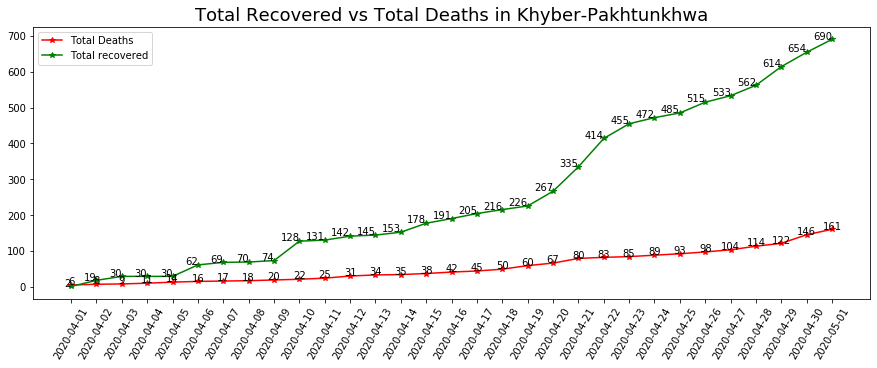

In [65]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["KP"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["KP"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.title("Total Recovered vs Total Deaths in Khyber-Pakhtunkhwa", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["KP"],color="g", marker="*", label="Total recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["KP"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()
plt.show()

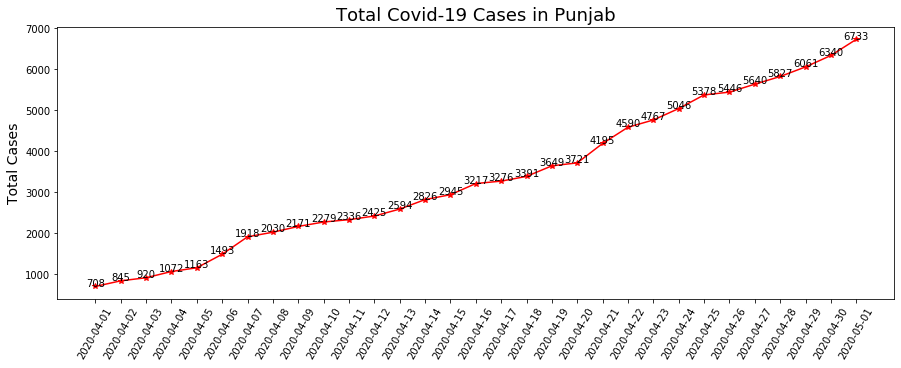

In [67]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["Punjab"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["Punjab"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in Punjab", fontsize=18)
plt.xticks(rotation=60)
plt.show()

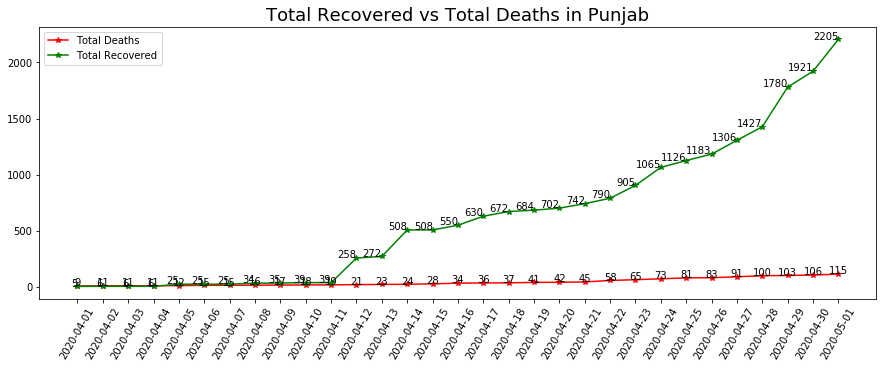

In [63]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["Punjab"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["Punjab"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.title("Total Recovered vs Total Deaths in Punjab", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["Punjab"],color="g", marker="*", label="Total Recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["Punjab"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()
plt.show()

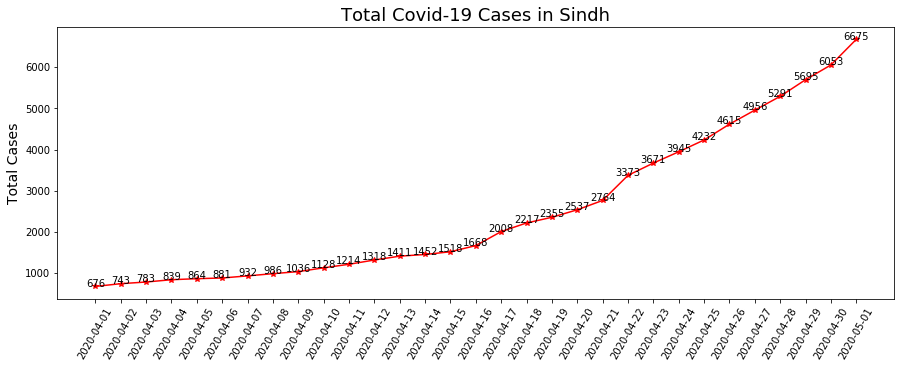

In [60]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_confirmed_cases_april["Date"],regionwise_confirmed_cases_april["Confirmed Cases"]["Sindh"],color="r", marker="*")
for i, v in enumerate(regionwise_confirmed_cases_april["Confirmed Cases"]["Sindh"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.ylabel("Total Cases", fontsize=14)
plt.title("Total Covid-19 Cases in Sindh", fontsize=18)
plt.xticks(rotation=60)
plt.show()

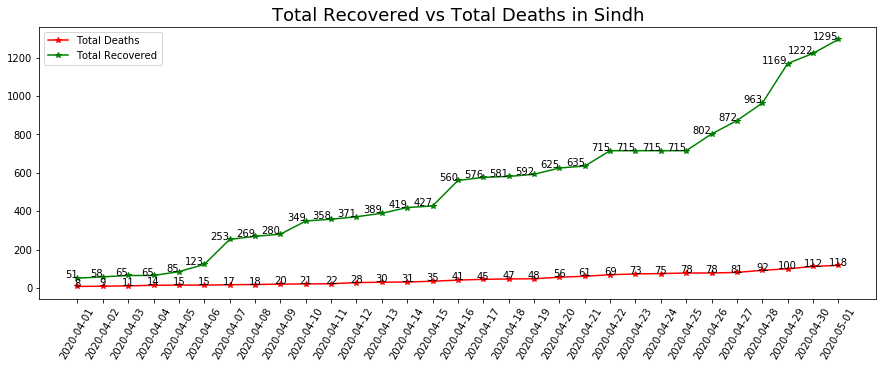

In [62]:
plt.figure(figsize=(15,5))
plt.plot(regionwise_deaths_april["Date"],regionwise_deaths_april["Deaths"]["Sindh"],color="r", marker="*", label="Total Deaths")
for i, v in enumerate(regionwise_deaths_april["Deaths"]["Sindh"]):
    plt.text(i, v, "%d" %v, ha="center")
plt.title("Total Recovered vs Total Deaths in Sindh", fontsize=18)
plt.xticks(rotation=60)
plt.plot(regionwise_recovered_april["Date"],regionwise_recovered_april["Recovered"]["Sindh"],color="g", marker="*", label="Total Recovered")
for i, v in enumerate(regionwise_recovered_april["Recovered"]["Sindh"]):
    plt.text(i, v, "%d" %v, ha="right")
plt.legend()    
plt.show()

In [43]:
regionwise_data=data.pivot_table(values=["Suspected Cases", "Tests Performed","Confirmed Cases",
                         "Recovered","Deaths","Active Cases"],
                index="Region", aggfunc="max")
regionwise_data= regionwise_data[["Suspected Cases", "Tests Performed","Confirmed Cases",
                         "Recovered","Deaths","Active Cases"]]
regionwise_data.reset_index(inplace=True)
regionwise_data

,Region,Suspected Cases,Tests Performed,Confirmed Cases,Recovered,Deaths,Active Cases
0,AJK,2038,2038,66,43,0,42
1,Balochistan,15335,9435,1136,183,16,139
2,GB,4370,3932,340,255,3,88
3,ICT,11194,11194,365,44,4,24
4,KP,17495,18504,2799,690,161,616
5,Punjab,53262,82651,6733,2205,115,1719
6,Sindh,54377,54377,6675,1295,118,1323


In [44]:
regionwise_data["Population"]=[4045000,12344408,1249000,2006572,35525047,110012442,47886051]

In [46]:
regionwise_data["Confirmed Cases Per Million"]=(regionwise_data["Confirmed Cases"]/regionwise_data["Population"])*1000000

In [47]:
regionwise_data_per_million=pd.DataFrame({
    "Region":regionwise_data["Region"],
    "Suspected Cases Per Million":(regionwise_data["Suspected Cases"]/regionwise_data["Population"])*1000000,
     "Tests Per Million":(regionwise_data["Tests Performed"]/regionwise_data["Population"])*1000000,
     "Confirmed Cases Per Million":(regionwise_data["Confirmed Cases"]/regionwise_data["Population"])*1000000,
     "Recovered Per Million":(regionwise_data["Recovered"]/regionwise_data["Population"])*1000000,
     "Deaths Per Million":(regionwise_data["Deaths"]/regionwise_data["Population"])*1000000,
     "Active Cases Per Million":(regionwise_data["Active Cases"]/regionwise_data["Population"])*1000000,})
regionwise_data_per_million

,Region,Suspected Cases Per Million,Tests Per Million,Confirmed Cases Per Million,Recovered Per Million,Deaths Per Million,Active Cases Per Million
0,AJK,503.831891,503.831891,16.316440,10.630408,0.000000,10.383189
1,Balochistan,1242.262893,764.313688,92.025474,14.824526,1.296133,11.260159
2,GB,3498.799039,3148.118495,272.217774,204.163331,2.401922,70.456365
3,ICT,5578.668495,5578.668495,181.902269,21.927945,1.993450,11.960697
4,KP,492.469440,520.871936,78.789481,19.422916,4.532014,17.339879
5,Punjab,484.145239,751.287750,61.202168,20.043187,1.045336,15.625505
6,Sindh,1135.549891,1135.549891,139.393411,27.043366,2.464183,27.628087


In [48]:
pakistan_data=pd.DataFrame({"Country":"Pakistan",
                            "Total Suspected Cases":regionwise_data["Suspected Cases"].sum(),
                            "Total Tets Performed":regionwise_data["Tests Performed"].sum(),
                            "Total Confirmed Cases":regionwise_data["Confirmed Cases"].sum(),
                            "Total Recovered":regionwise_data["Recovered"].sum(),
                            "Total Deaths":regionwise_data["Deaths"].sum(),
                            "Total Active Cases":regionwise_data["Active Cases"].sum(),
                           "Total Population":regionwise_data["Population"].sum()},
                          index=[0])
pakistan_data

,Country,Total Suspected Cases,Total Tets Performed,Total Confirmed Cases,Total Recovered,Total Deaths,Total Active Cases,Total Population
0,Pakistan,158071,182131,18114,4715,417,3951,213068520


In [49]:
pakistan_data_per_million=pd.DataFrame({
    "Country":"Pakistan",
    "Total Suspected Cases Per Million":(pakistan_data["Total Suspected Cases"]/pakistan_data["Total Population"])*1000000,
     "Total Tests Per Million":(pakistan_data["Total Tets Performed"]/pakistan_data["Total Population"])*1000000,
     "Total Confirmed Cases Per Million":(pakistan_data["Total Confirmed Cases"]/pakistan_data["Total Population"])*1000000,
     "Total Recovered Per Million":(pakistan_data["Total Recovered"]/pakistan_data["Total Population"])*1000000,
     "Total Deaths Per Million":(pakistan_data["Total Deaths"]/pakistan_data["Total Population"])*1000000,
     "Total Active Cases Per Million":(pakistan_data["Total Active Cases"]/pakistan_data["Total Population"])*1000000,},
index=[0])
pakistan_data_per_million

,Country,Total Suspected Cases Per Million,Total Tests Per Million,Total Confirmed Cases Per Million,Total Recovered Per Million,Total Deaths Per Million,Total Active Cases Per Million
0,Pakistan,741.878716,854.800137,85.014905,22.129032,1.957117,18.543331


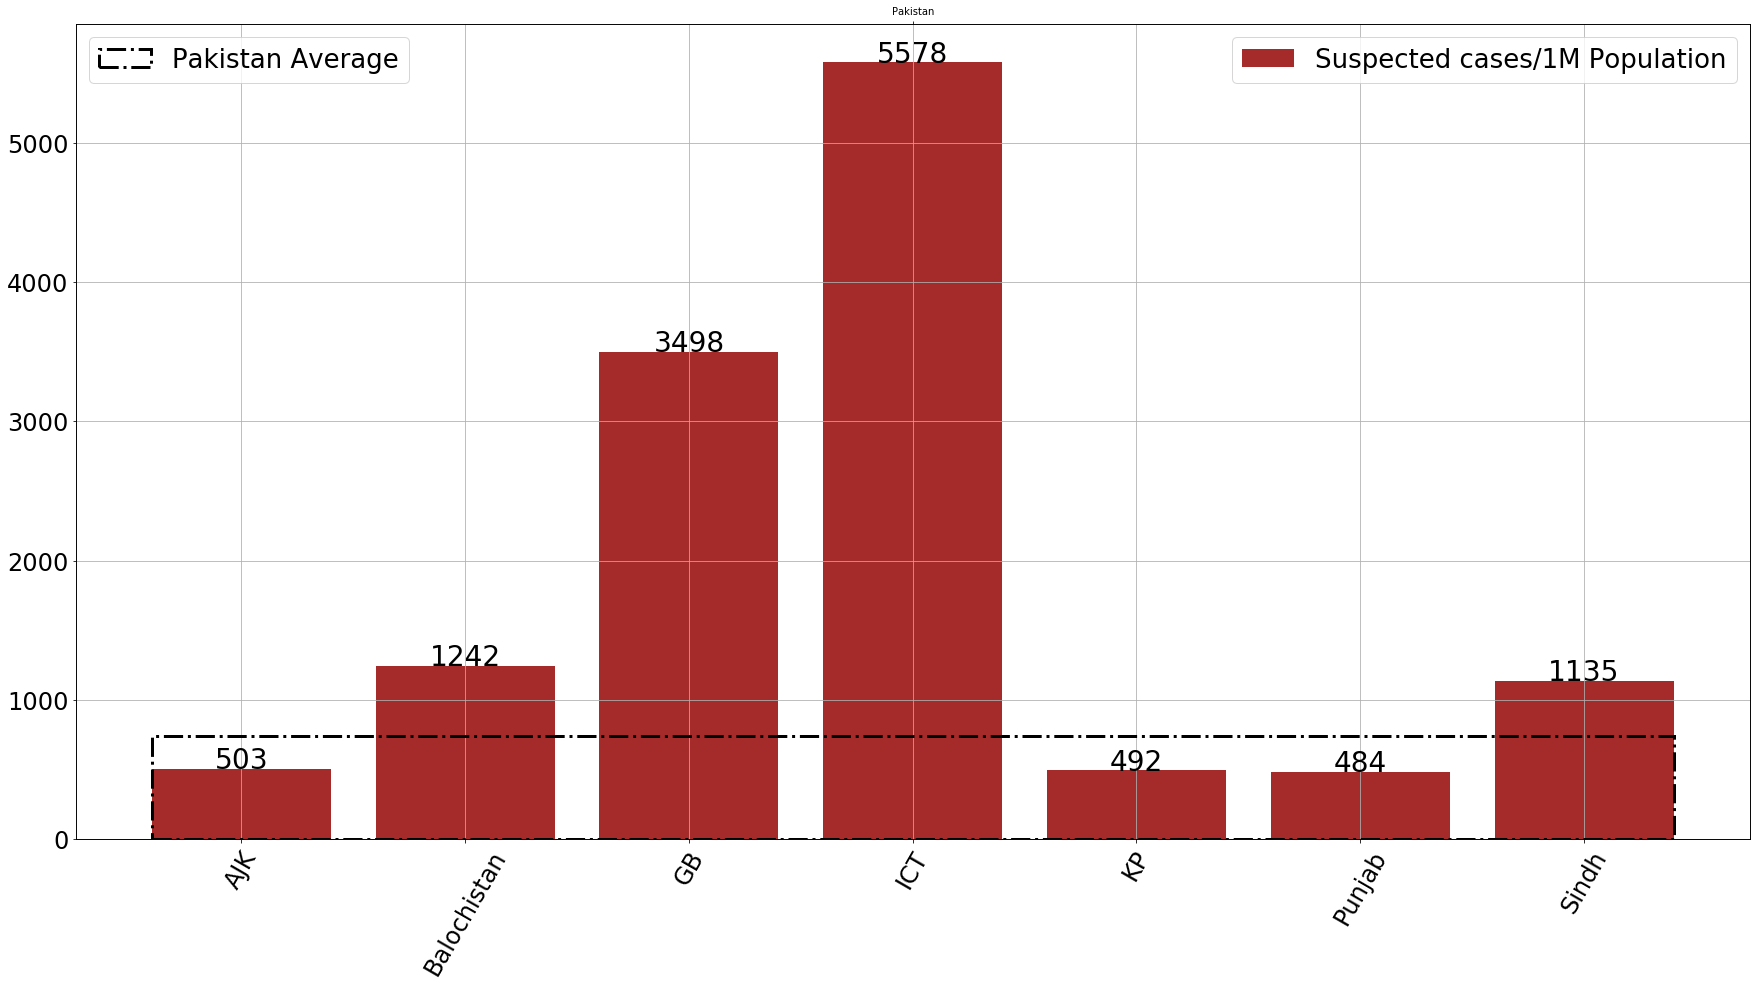

In [50]:
plt.figure(figsize=(30,15))
plt.grid(zorder=0)
plt.bar(regionwise_data_per_million["Region"], regionwise_data_per_million["Suspected Cases Per Million"], label='Suspected cases/1M Population', color="brown")
for i, v in enumerate(regionwise_data_per_million["Suspected Cases Per Million"]):
    plt.text(i, v+2, "%d" %v, ha="center", fontsize=28)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.twiny()
plt.bar(pakistan_data_per_million["Country"], pakistan_data_per_million["Total Suspected Cases Per Million"], label='Pakistan Average', color="r", 
        fill=False, ls="-.", lw=3)
plt.legend(fontsize=26, loc="upper left")
plt.show()

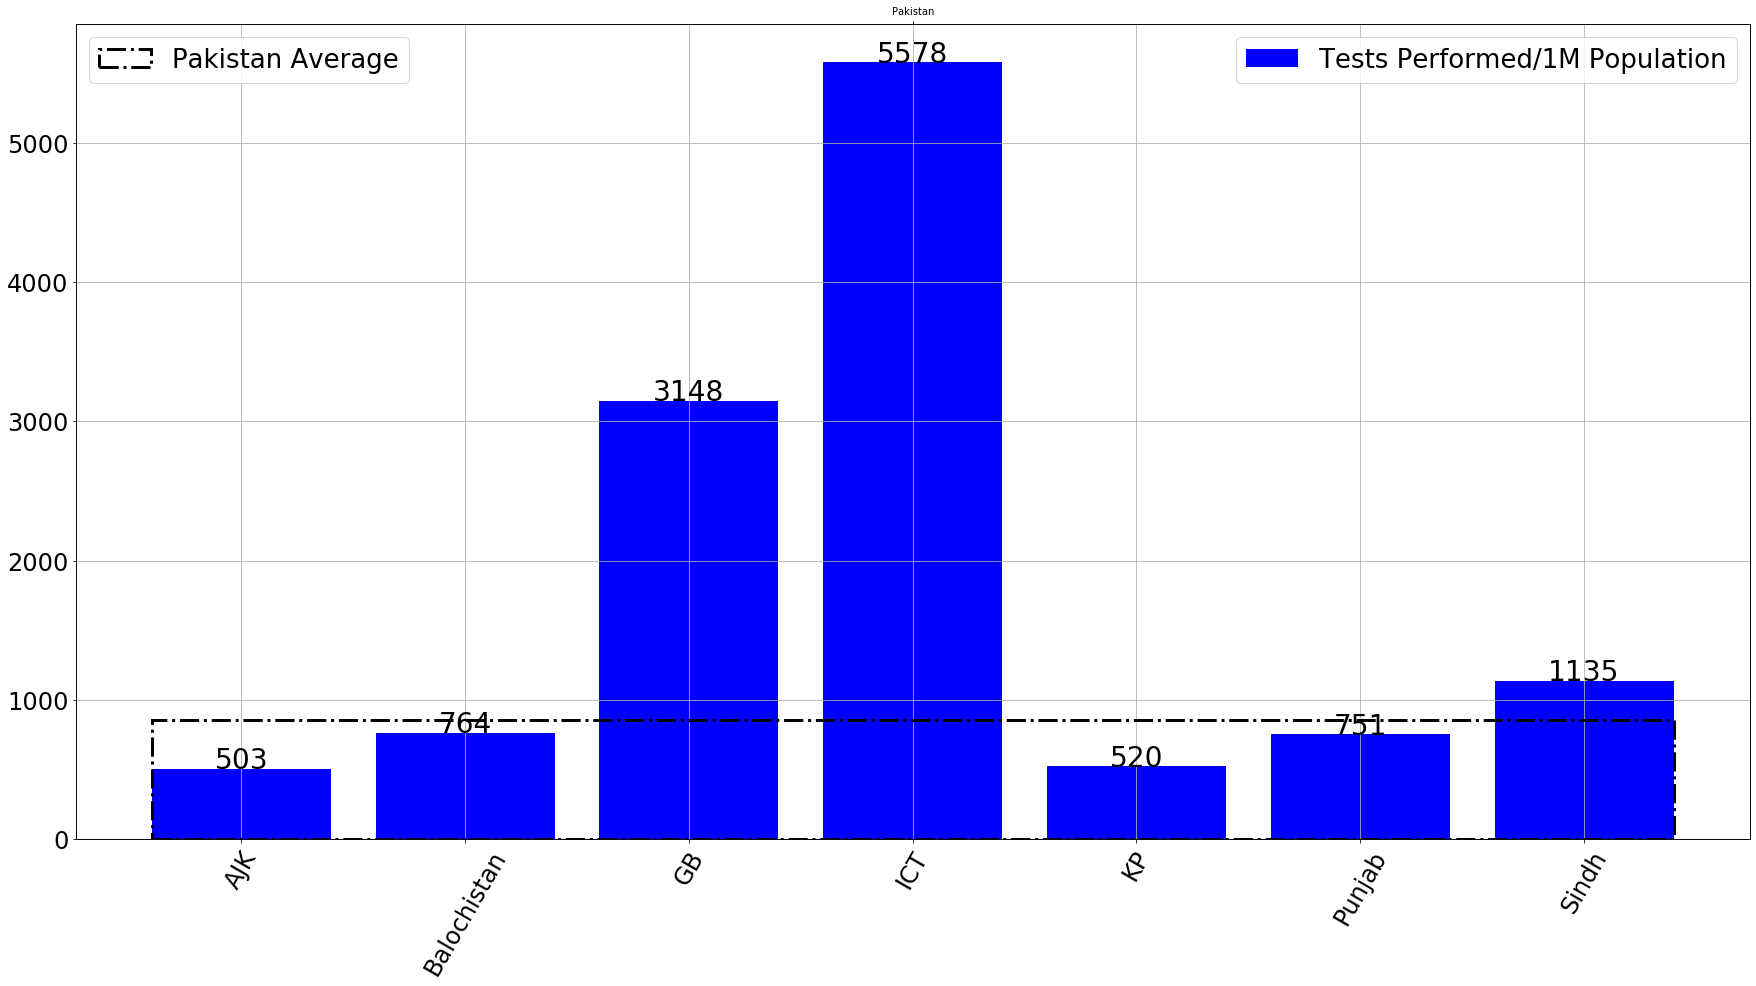

In [51]:
plt.figure(figsize=(30,15))
plt.grid(zorder=0)
plt.bar(regionwise_data_per_million["Region"], regionwise_data_per_million["Tests Per Million"], label='Tests Performed/1M Population', color="b")
for i, v in enumerate(regionwise_data_per_million["Tests Per Million"]):
    plt.text(i, v+2, "%d" %v, ha="center", fontsize=28)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.twiny()
plt.bar(pakistan_data_per_million["Country"], pakistan_data_per_million["Total Tests Per Million"], label='Pakistan Average', color="r", 
        fill=False, ls="-.", lw=3)
plt.legend(fontsize=26, loc="upper left")
plt.show()

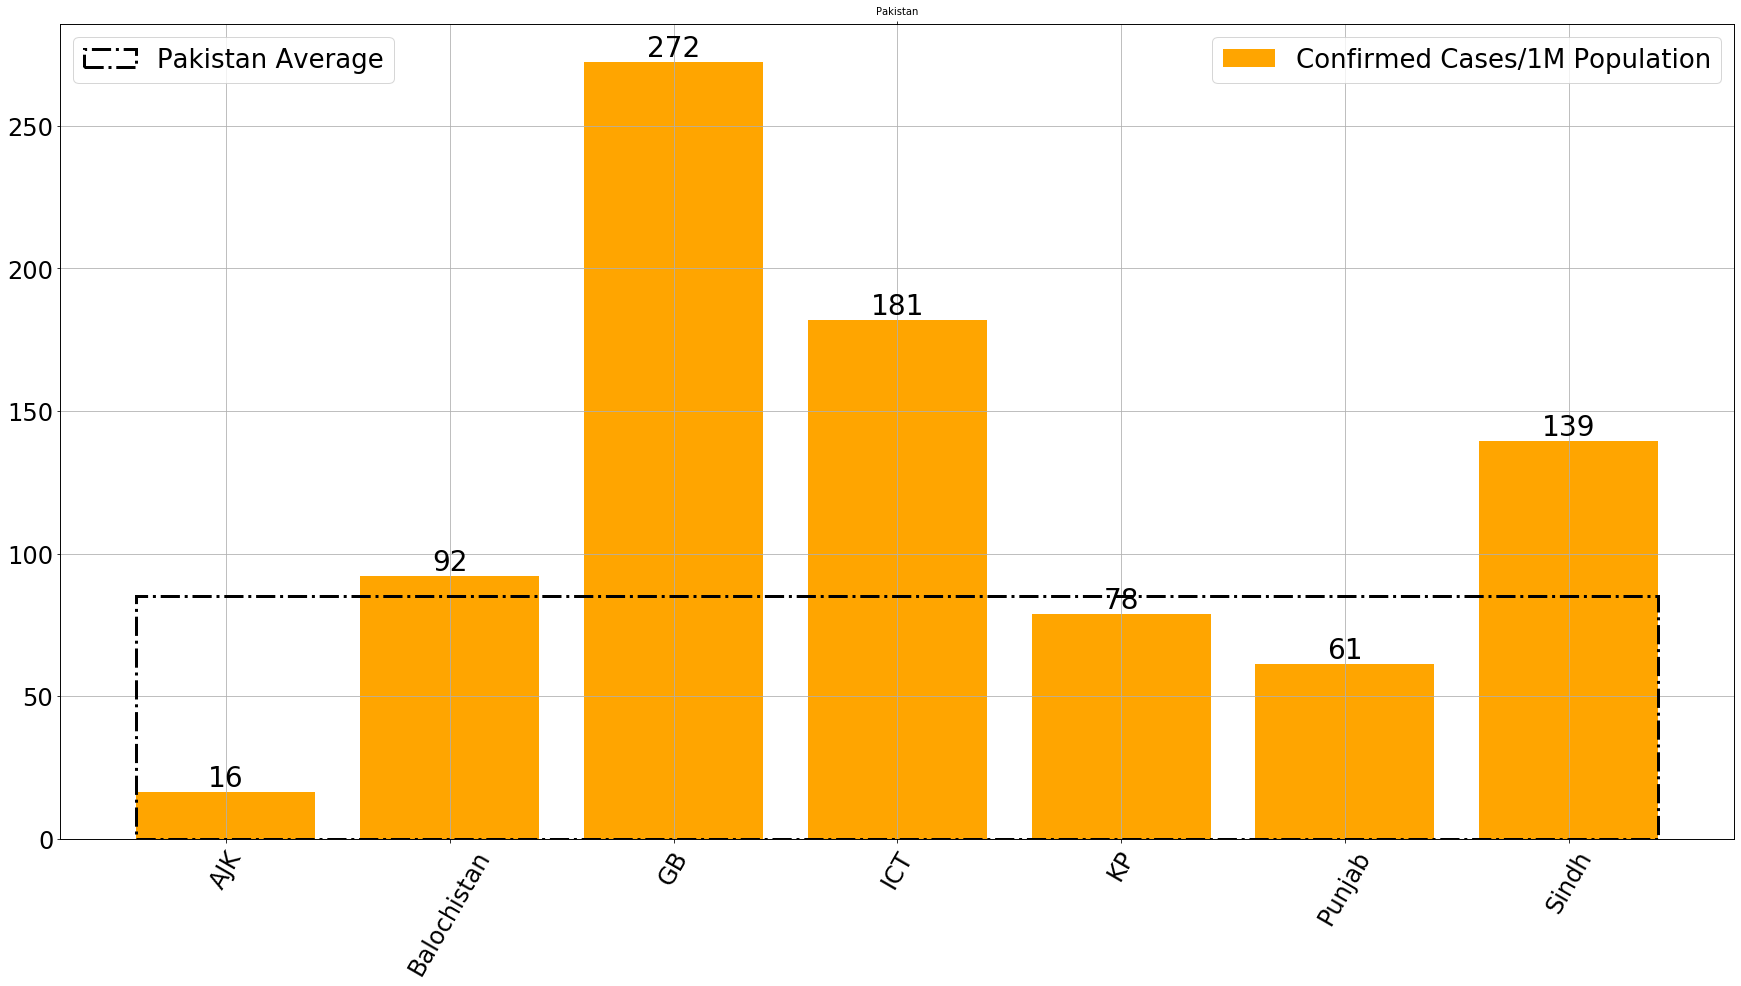

In [52]:
plt.figure(figsize=(30,15))
plt.grid(zorder=0)
plt.bar(regionwise_data_per_million["Region"], regionwise_data_per_million["Confirmed Cases Per Million"], label='Confirmed Cases/1M Population', color="orange")
for i, v in enumerate(regionwise_data_per_million["Confirmed Cases Per Million"]):
    plt.text(i, v+2, "%d" %v, ha="center", fontsize=28)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.twiny()
plt.bar(pakistan_data_per_million["Country"], pakistan_data_per_million["Total Confirmed Cases Per Million"], label='Pakistan Average', color="r", 
        fill=False, ls="-.", lw=3)
plt.legend(fontsize=26, loc="upper left")
plt.show()

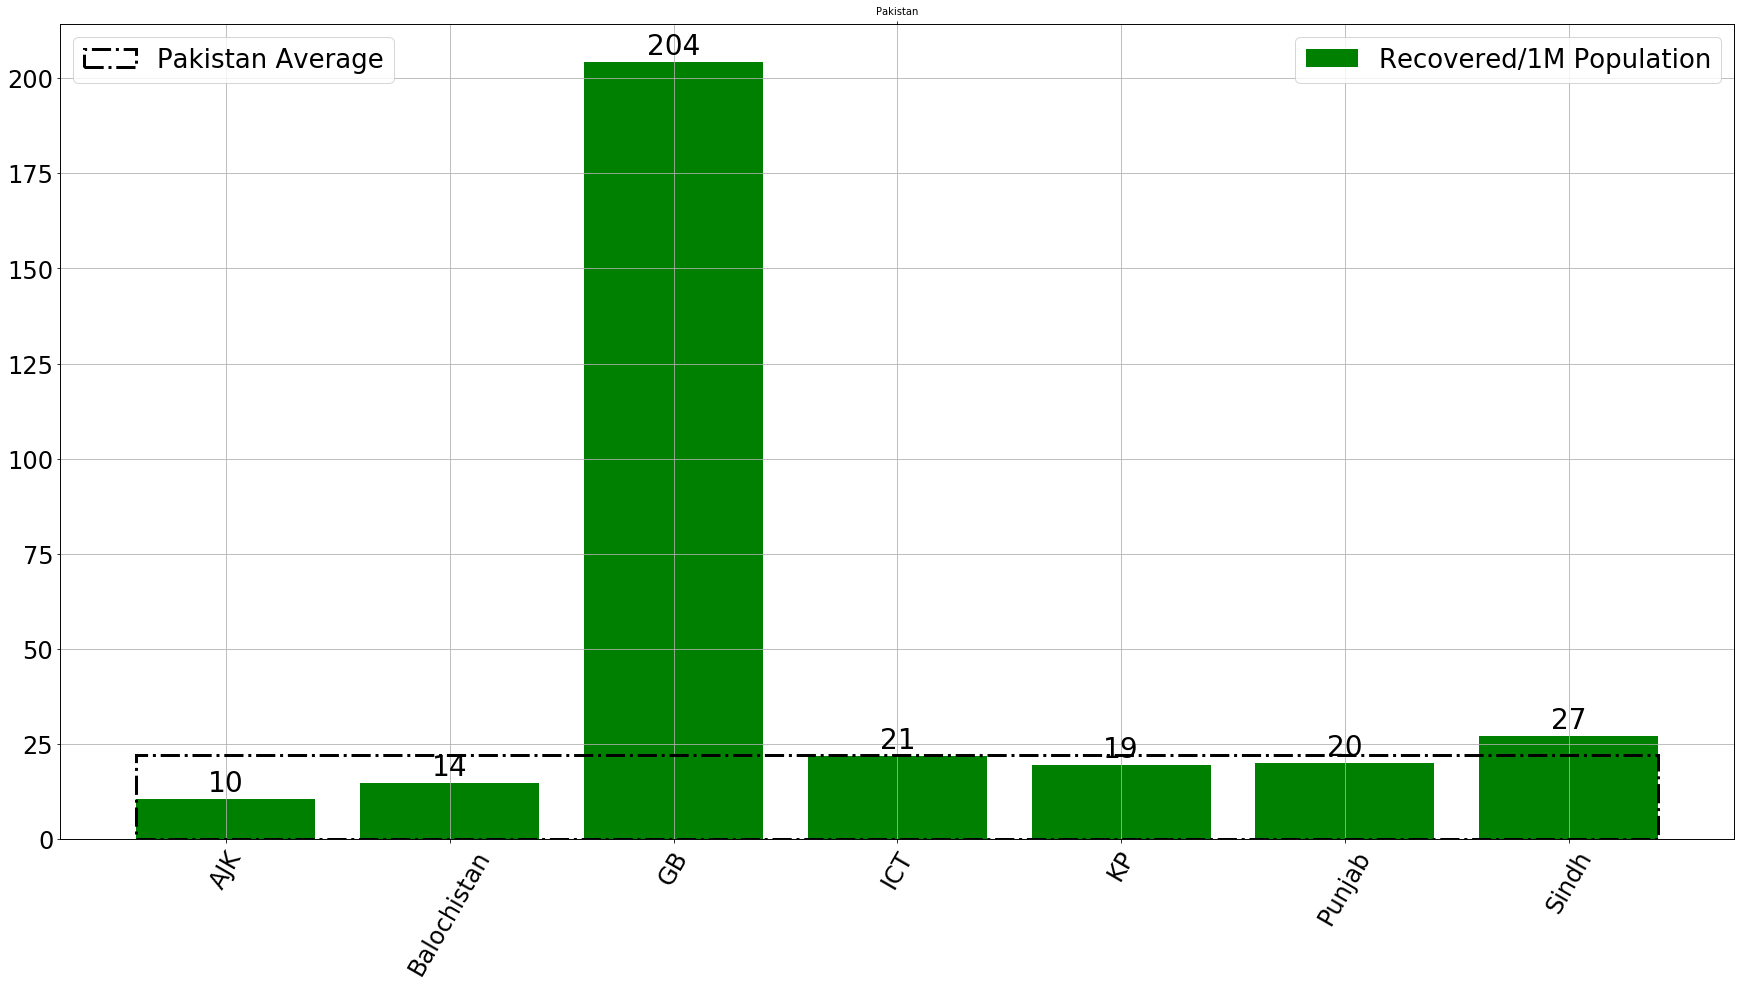

In [53]:
plt.figure(figsize=(30,15))
plt.grid(zorder=0)
plt.bar(regionwise_data_per_million["Region"], regionwise_data_per_million["Recovered Per Million"], label='Recovered/1M Population', color="g")
for i, v in enumerate(regionwise_data_per_million["Recovered Per Million"]):
    plt.text(i, v+2, "%d" %v, ha="center", fontsize=28)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.twiny()
plt.bar(pakistan_data_per_million["Country"], pakistan_data_per_million["Total Recovered Per Million"], label='Pakistan Average', color="r", 
        fill=False, ls="-.", lw=3)
plt.legend(fontsize=26, loc="upper left")
plt.show()

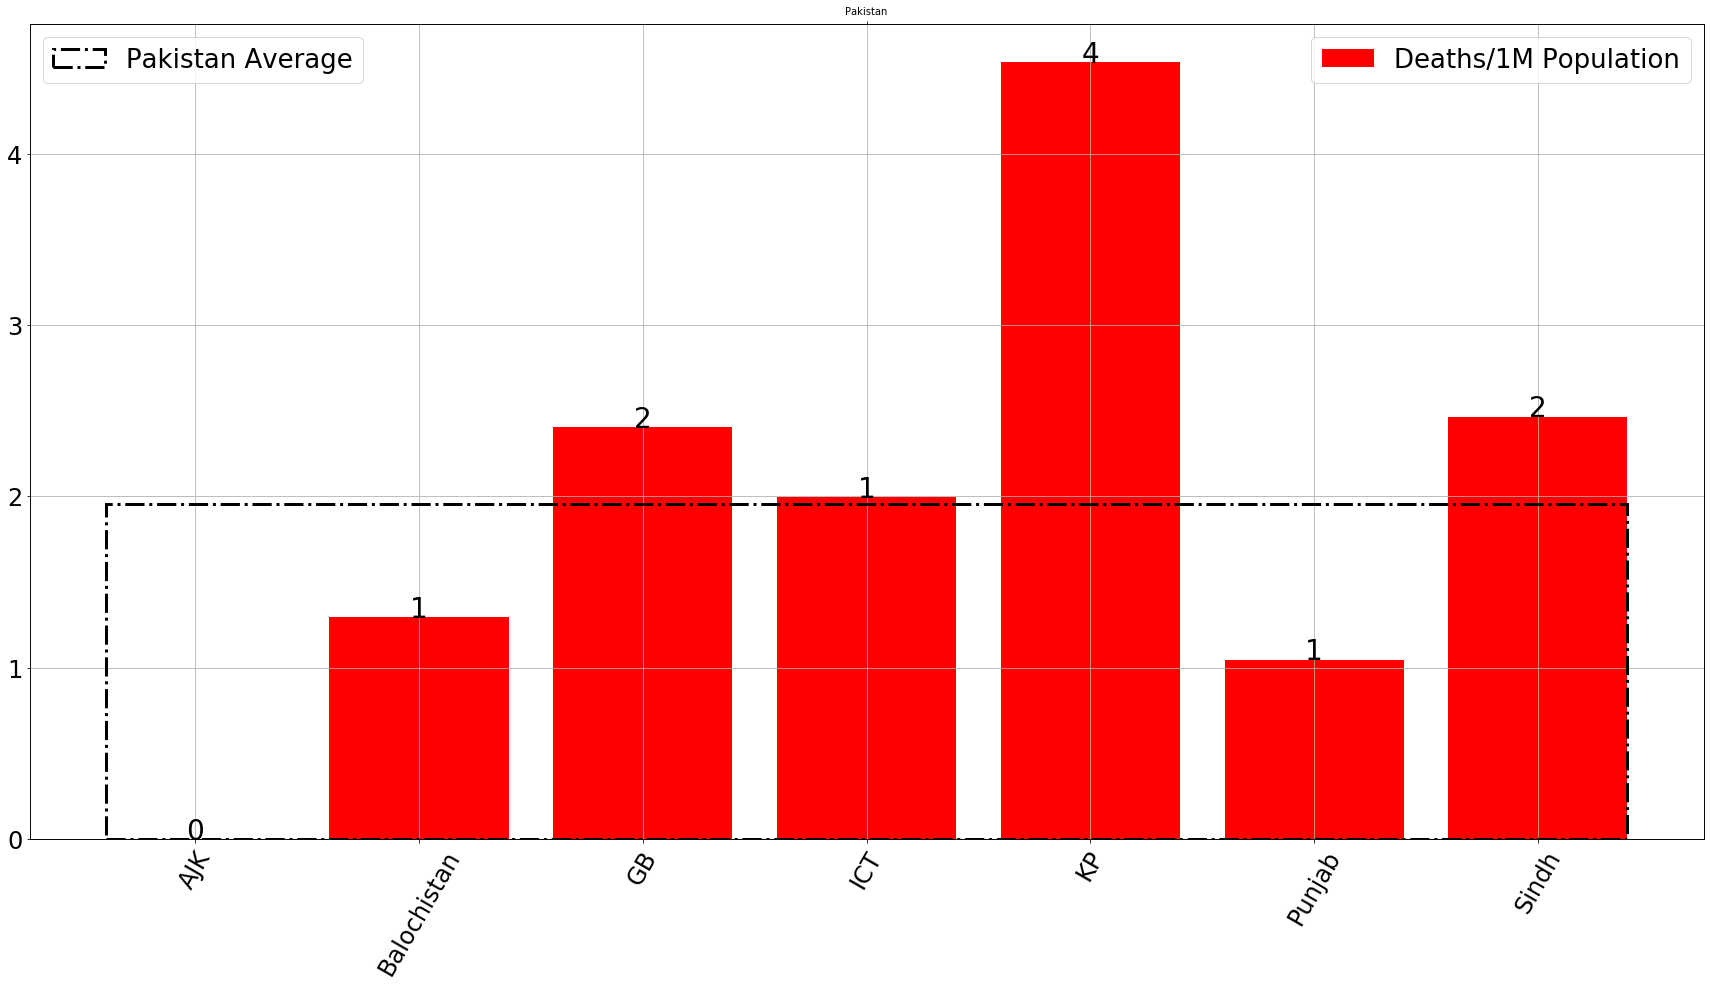

In [54]:
plt.figure(figsize=(30,15))
plt.grid(zorder=0)
plt.bar(regionwise_data_per_million["Region"], regionwise_data_per_million["Deaths Per Million"], label='Deaths/1M Population', color="r")
for i, v in enumerate(regionwise_data_per_million["Deaths Per Million"]):
    plt.text(i, v, "%d" %v, ha="center", fontsize=28)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.twiny()
plt.bar(pakistan_data_per_million["Country"], pakistan_data_per_million["Total Deaths Per Million"], label='Pakistan Average', color="r", 
        fill=False, ls="-.", lw=3)
plt.legend(fontsize=26, loc="upper left")
plt.show()

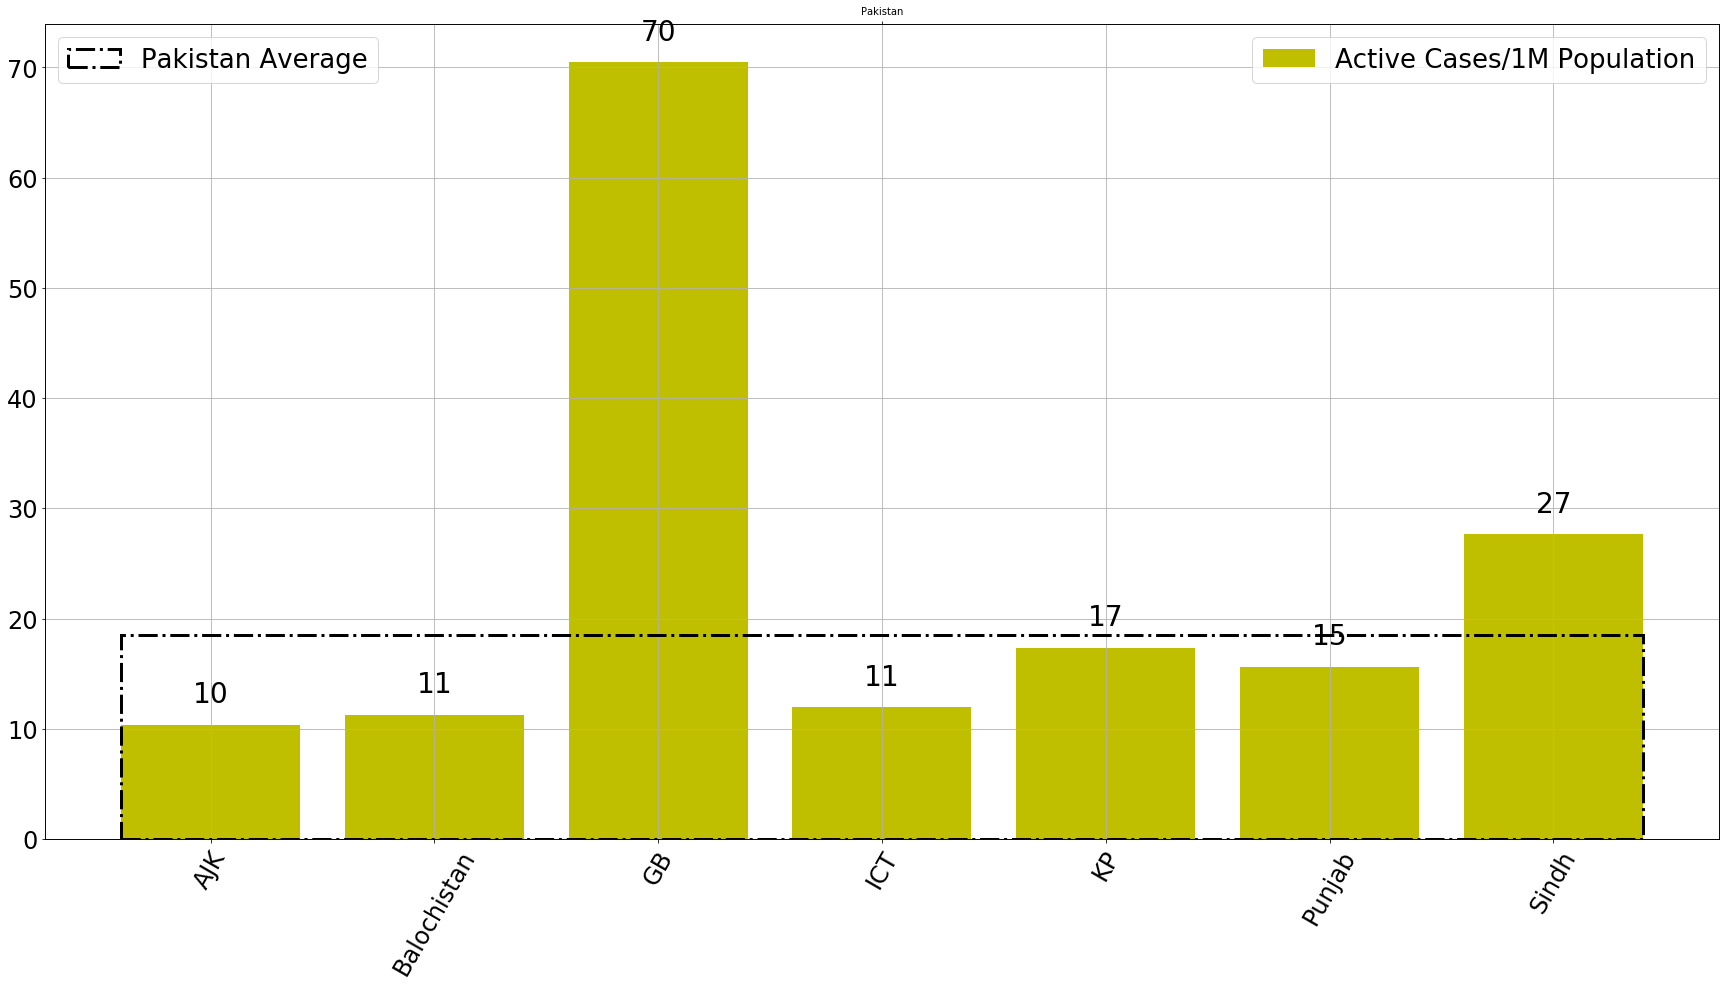

In [55]:
plt.figure(figsize=(30,15))
plt.grid(zorder=0)
plt.bar(regionwise_data_per_million["Region"], regionwise_data_per_million["Active Cases Per Million"], label='Active Cases/1M Population', color="y")
for i, v in enumerate(regionwise_data_per_million["Active Cases Per Million"]):
    plt.text(i, v+2, "%d" %v, ha="center", fontsize=28)
plt.xticks(fontsize=24,rotation=60)
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.twiny()
plt.bar(pakistan_data_per_million["Country"], pakistan_data_per_million["Total Active Cases Per Million"], label='Pakistan Average', color="r", 
        fill=False, ls="-.", lw=3)
plt.legend(fontsize=26, loc="upper left")
plt.show()